In [1]:
from lib.data import Mimic2
import numpy as np
from lib.train import Trainer, prepareData
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.regularization import eye_loss, wridge, wlasso, lasso, ridge, owl
from sklearn.metrics import accuracy_score
from lib.utility import get_y_yhat, model_auc
import torch
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from main import random_risk_exp, expert_feature_only_exp, reg_exp
import glob
from sklearn.externals import joblib
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
raw_data = []
for fn in glob.glob('models/random*.pkl'):
    name = fn.split('/')[-1].split('.pkl')[0]
    name, alpha = name.split('^')
    if 'test' in name: name = name[4:]+'*'
    auc, ap, s1, sp = joblib.load(fn)
    raw_data.append([name, alpha, auc, ap, s1, sp])

df = DataFrame(data=raw_data, columns=['method name', 'alpha', 'auc', 'ap', 'min(rec, prec)', 'sparsity'])
print(df.sort_values(['auc'], ascending=False))

           method name alpha       auc        ap  min(rec, prec)  sparsity
0  random_risk_wlasso3  0.01  0.812679  0.438041        0.480769  0.514209
1  random_risk_wlasso3   0.1  0.673896  0.422951        0.380952  0.956285


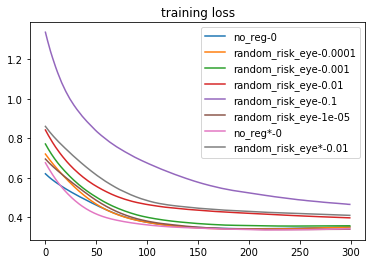

In [7]:
for fn in glob.glob('models/*.valloss.npy'):
    name = fn.split('/')[-1].split('.valloss')[0]
    name, alpha = name.split('^')
    if 'test' in name: name = name[4:]+'*'
    losses = np.load(fn)
    plt.title("training loss")
    plt.plot(losses, label="%s-%s" % (name, alpha))
    
plt.legend()
plt.show()

# calculate correlation among variables

In [26]:
m = Mimic2()
m.xtrain.shape

(2250, 131)

/Users/jiaxuan/interpretable_dimension/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/jiaxuan/interpretable_dimension/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


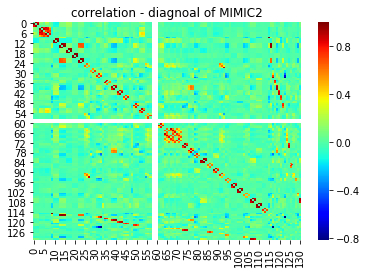

In [28]:
corr = np.corrcoef(m.xtrain.T)
plt.title('correlation - diagnoal of MIMIC2')
sns.heatmap(corr - np.diag(np.diag(corr)), cmap='jet')

Text(0.5,1,'correlation - diagonal among risk factors')

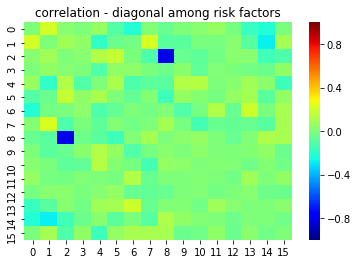

In [64]:
sub_corr = corr[131-16:131, 131-16:131]
sns.heatmap(sub_corr - np.diag(np.diag(sub_corr)), cmap='jet', vmin=-1, vmax=1)
plt.title('correlation - diagonal among risk factors')

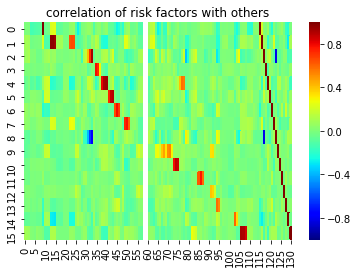

In [65]:
sub_corr = corr[131-16:131]
plt.title('correlation of risk factors with others')
sns.heatmap(sub_corr, cmap='jet', vmin=-1, vmax=1)